Regression Trees


In this project, you will learn how to implement regression trees using ScikitLearn. We will show what parameters are important, how to train a regression tree, and finally how to determine our regression trees accuracy.

Objectives
After completing this lab you will be able to:

Train a Regression Tree
Evaluate a Regression Trees Performance

Setup

For this lab, we are going to be using Python and several Python libraries. Some of these libraries might be installed in your lab environment or in SN Labs. Others may need to be installed by you. 

The cells below will install these libraries when executed.

In [6]:
# Pandas will allow us to create a dataframe of the data so it can be used and manipulated
import pandas as pd
# Regression Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
# Split our data into a training and testing data
from sklearn.model_selection import train_test_split

In [3]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv"


About the Dataset

Imagine you are a data scientist working for a real estate company that is planning to invest in Boston real estate. You have collected information about various areas of Boston and are tasked with created a model that can predict the median price of houses for that area so it can be used to make offers.

The dataset had information on areas/towns not individual houses, the features are

CRIM: Crime per capita

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxides concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to ﬁve Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property-tax rate per $10,000

PTRAIO: Pupil-teacher ratio by town

LSTAT: Percent lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

Read the Data

Lets read in the data we have downloaded

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


Now lets learn about the size of our data

In [8]:
df.shape

(506, 13)

Most of the data is valid, there are rows with missing values which we will deal with in pre-processing. 

To see missing values, use method isna or isnull

In [10]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

Data Pre-Processing

First lets drop the rows with missing values because we have enough data in our dataset

In [12]:
df.dropna(inplace=True)

Check again to see if there are still missing values

In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Now we can see our dataset has no missing values

Lets split the dataset into our features and what we are predicting (target)

In [14]:
X = df.drop(columns=["MEDV"])
Y = df["MEDV"]

In [15]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [16]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

Finally lets split our data into a training and testing dataset using train_test_split from sklearn.model_selection

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

Create Regression Tree

Regression Trees are implemented using DecisionTreeRegressor from sklearn.tree

The important parameters of DecisionTreeRegressor are

criterion: {'squared_error', 'absolute_error', 'poisson', 'friedman_mse'} - The function used to measure error

max_depth - The max depth the tree can be

min_samples_split - The minimum number of samples required to split a node

min_samples_leaf - The minimum number of samples that a leaf can contain

max_features: {"auto", "sqrt", "log2"} - The number of feature we examine looking for the best one, used to speed up training

First lets start by creating a DecisionTreeRegressor object, setting the criterion parameter to squared_error for Squared Error

In [18]:
regression_tree = DecisionTreeRegressor(criterion = "squared_error")

Training

Now lets train our model using the fit method on the DecisionTreeRegressor object providing our training data

In [19]:
regression_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

Evaluation

To evaluate our dataset we will use the score method of the DecisionTreeRegressor object providing our testing data, this number is the R Squared value which indicates the coefficient of determination

In [20]:
regression_tree.score(X_test, Y_test)

0.8547883237926656

We can also find the average error in our testing set which is the average error in median home value prediction

In [21]:
prediction = regression_tree.predict(X_test)

print("$",(prediction - Y_test).abs().mean()*1000)

$ 2683.5443037974683


Train a regression tree using the criterion squared_error then report its  
R Squared value and average error

In [23]:
regression_tree = DecisionTreeRegressor(criterion = "squared_error")

regression_tree.fit(X_train, Y_train)

print(regression_tree.score(X_test, Y_test))

prediction = regression_tree.predict(X_test)

print("$",(prediction - Y_test).abs().mean()*1000)

0.7671813263589917
$ 2881.0126582278485


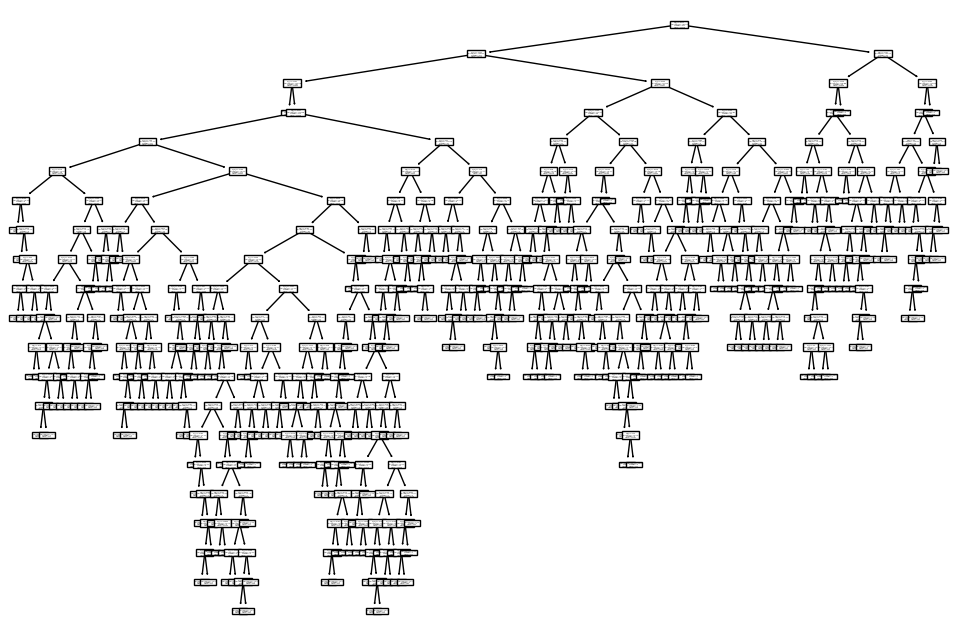

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(regression_tree)
plt.show()